In [2]:
import pandas as pd

csv_path = 'CICEVSE2024_Dataset/Host Events/EVSE-B-HPC-Kernel-Events-Combined.csv'
data = pd.read_csv(csv_path)

print(data.columns)

/var/folders/ld/jh0yyxmx3_lcjxtb749x8drw0000gn/T/ipykernel_5096/4162373455.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,25

Index(['time', 'alarmtimer_alarmtimer_cancel', 'alarmtimer_alarmtimer_fired',
       'alarmtimer_alarmtimer_start', 'alarmtimer_alarmtimer_suspend',
       'alignment-faults', 'ase_spec', 'block_block_bio_backmerge',
       'block_block_bio_bounce', 'block_block_bio_complete',
       ...
       'writeback_writeback_written', 'State', 'Attack', 'Scenario', 'Label',
       'interface', 'Unnamed: 911', 'Unnamed: 912', 'Unnamed: 913',
       'Unnamed: 914'],
      dtype='object', length=915)


In [4]:
hpc_features  = ['ase_spec', 'br_immed_spec', 'br_indirect_spec', 'br_mis_pred',
                'br_pred', 'br_return_spec', 'branch-load-misses', 'branch-loads',
                'branch-misses', 'bus_access', 'bus_access_normal',
                'bus_access_not_shared', 'bus_access_periph', 'bus_access_rd',
                'bus_access_wr', 'bus-cycles', 'cache-misses', 'cache-references',
                'cgroup-switches', 'context-switches', 'cpu-cycles', 'cpu-migrations',
                'dmb_spec', 'dp_spec', 'dsb_spec', 'dTLB-load-misses',
                'dTLB-store-misses', 'exc_dabort', 'exc_irq', 'exc_pabort',
                'exc_return', 'exc_svc', 'exc_taken', 'exc_undef', 'inst_retired',
                'inst_spec', 'instructions', 'isb_spec', 'iTLB-load-misses',
                'l1d_cache', 'l1d_cache_inval', 'l1d_cache_rd', 'l1d_cache_refill',
                'l1d_cache_refill_rd', 'l1d_cache_refill_wr', 'l1d_cache_wb',
                'l1d_cache_wb_clean', 'l1d_cache_wb_victim', 'l1d_cache_wr',
                'l1d_tlb_refill', 'l1d_tlb_refill_rd', 'l1d_tlb_refill_wr',
                'L1-dcache-load-misses', 'L1-dcache-loads', 'L1-dcache-store-misses',
                'L1-dcache-stores', 'l1i_cache', 'l1i_cache_refill', 'l1i_tlb_refill',
                'L1-icache-load-misses', 'L1-icache-loads', 'l2d_cache', 'l2d_cache_rd',
                'l2d_cache_refill', 'l2d_cache_refill_rd', 'l2d_cache_refill_wr',
                'l2d_cache_wb', 'l2d_cache_wb_clean', 'l2d_cache_wb_victim',
                'l2d_cache_wr', 'ld_spec', 'ldrex_spec', 'ldst_spec', 'mem_access',
                'mem_access_rd', 'mem_access_wr', 'minor-faults', 'msec', 'node-loads',
                'node-stores', 'page-faults', 'pc_write_spec', 'rc_ld_spec',
                'rc_st_spec', 'st_spec', 'strex_fail_spec', 'strex_pass_spec',
                'ttbr_write_retired', 'unaligned_ld_spec', 'unaligned_ldst_spec',
                'unaligned_st_spec', 'vfp_spec']

hpc_columns = [col for col in data.columns if col in hpc_features]
additional_columns = ['State', 'Attack', 'Scenario', 'Label', 'interface']
hpc_columns.extend(additional_columns) 

hpc_data = data[hpc_columns]

print(f'HPC Data Shape: {hpc_data.shape}')


hpc_features_cleaned = hpc_data[hpc_features].apply(pd.to_numeric, errors='coerce')

print(hpc_features_cleaned.shape)
print(hpc_features_cleaned.isna().sum())

hpc_data_cleaned = hpc_features_cleaned.dropna()

print(hpc_features_cleaned.shape)

categorical_columns = ['State', 'Attack', 'Scenario', 'Label', 'interface']
categorical_data = hpc_data[categorical_columns]

hpc_data_with_labels = pd.concat([hpc_data_cleaned, categorical_data], axis=1)

print(f"Final Data Shape After Cleaning: {hpc_data_with_labels.shape}")

HPC Data Shape: (8474, 97)
(8474, 92)
ase_spec               6
br_immed_spec          6
br_indirect_spec       6
br_mis_pred            6
br_pred                6
                      ..
ttbr_write_retired     6
unaligned_ld_spec      6
unaligned_ldst_spec    6
unaligned_st_spec      6
vfp_spec               6
Length: 92, dtype: int64
(8474, 92)
Final Data Shape After Cleaning: (8474, 97)


(8466, 9)
Number of principal components selected: 9


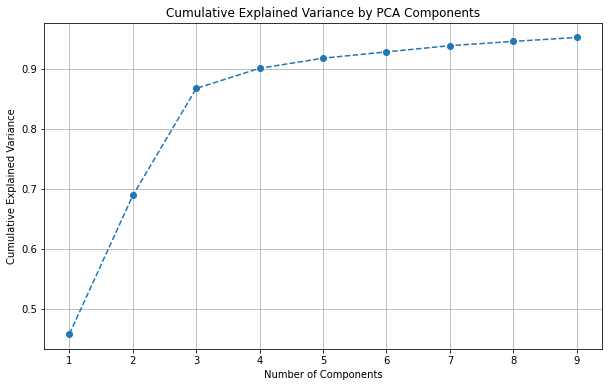

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
hpc_scaled = scaler.fit_transform(hpc_data_cleaned)

pca = PCA(n_components=0.95) 
hpc_pca = pca.fit_transform(hpc_scaled)
print(hpc_pca.shape)

print(f"Number of principal components selected: {pca.n_components_}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

combined_data = pd.concat([hpc_data_cleaned, hpc_data_with_labels[['State', 'Attack', 'Scenario', 'Label', 'interface']]], axis=1)

combined_data_cleaned = combined_data.dropna()

hpc_features_consistent = combined_data_cleaned[hpc_features]
labels_consistent = combined_data_cleaned['Label']


labels_consistent = labels_consistent.astype(str)

labels_consistent = labels_consistent.replace(['0', '0.0'], 'benign')

print(labels_consistent.unique())

scaler = StandardScaler()
hpc_scaled = scaler.fit_transform(hpc_features_consistent)


pca = PCA(n_components=0.95)  
hpc_pca = pca.fit_transform(hpc_scaled)
print(f"Number of rows after PCA: {hpc_pca.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(hpc_pca, labels_consistent, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_encoded)

y_pred_encoded = rf.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


['attack' 'benign']
Number of rows after PCA: 8466
Classification Report:
               precision    recall  f1-score   support

      attack       0.99      1.00      1.00       778
      benign       1.00      1.00      1.00       916

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694

Confusion Matrix:
 [[775   3]
 [  4 912]]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


combined_data = pd.concat([hpc_data_cleaned, hpc_data_with_labels[['State', 'Attack', 'Scenario', 'Label', 'interface']]], axis=1)

combined_data_cleaned = combined_data.dropna()

hpc_features_consistent = combined_data_cleaned[hpc_features]
labels_consistent = combined_data_cleaned['Scenario']


labels_consistent = labels_consistent.astype(str)

labels_consistent = labels_consistent.replace(['0', '0.0'], 'benign')
print(labels_consistent.unique())

scaler = StandardScaler()
hpc_scaled = scaler.fit_transform(hpc_features_consistent)

pca = PCA(n_components=0.95)  
hpc_pca = pca.fit_transform(hpc_scaled)
print(f"Number of rows after PCA: {hpc_pca.shape[0]}")

X_train, X_test, y_train, y_test = train_test_split(hpc_pca, labels_consistent, test_size=0.2, random_state=42)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_encoded)

y_pred_encoded = rf.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

['Cryptojacking' 'Benign' 'Recon' 'DoS' 'benign']
Number of rows after PCA: 8466
Classification Report:
                precision    recall  f1-score   support

       Benign       0.99      1.00      0.99       450
Cryptojacking       1.00      1.00      1.00       368
          DoS       0.96      0.94      0.95       173
        Recon       0.96      0.96      0.96       237
       benign       1.00      1.00      1.00       466

     accuracy                           0.99      1694
    macro avg       0.98      0.98      0.98      1694
 weighted avg       0.99      0.99      0.99      1694

Confusion Matrix:
 [[449   0   0   1   0]
 [  0 368   0   0   0]
 [  1   0 163   9   0]
 [  3   0   6 228   0]
 [  0   0   0   0 466]]
